In [1]:
# Hyo Sung Kim and Chin Yee Lee
# MUSA 620 - Final Project

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
import geopandas as gpd
import cartopy.crs as ccrs
from shapely.geometry import Point

In [4]:
# Importing Uber Data

In [5]:
# 2014
uber_apr14 = pd.read_csv("./UberData/uber-raw-data-apr14.csv")
uber_may14 = pd.read_csv("./UberData/uber-raw-data-may14.csv")
uber_jun14 = pd.read_csv("./UberData/uber-raw-data-jun14.csv")
uber_jul14 = pd.read_csv("./UberData/uber-raw-data-jul14.csv")
uber_aug14 = pd.read_csv("./UberData/uber-raw-data-aug14.csv")
uber_sep14 = pd.read_csv("./UberData/uber-raw-data-sep14.csv")

In [6]:
# Combined df should have x rows:
uber_apr14.shape[0]+uber_may14.shape[0]+uber_jun14.shape[0]+uber_jul14.shape[0]+uber_aug14.shape[0]+uber_sep14.shape[0]

4534327

In [7]:
# Combine 2014 data into one dataframe
frames = [uber_apr14, uber_may14, uber_jun14, uber_jul14, uber_aug14, uber_sep14]
uber_2014 = pd.concat(frames)

In [8]:
print(uber_2014.shape)
uber_2014.head()

(4534327, 4)


,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [9]:
# Rename columns(Date/Time to DateTime)
uber_2014.columns = ['DateTime', 'Lat', 'Lon', 'Base']

In [10]:
# Add Type Column
uber_2014['Type'] = 'Uber'

In [11]:
# Add Hour Column
uber_2014['Hour'] = uber_2014['DateTime'].str[9:]
uber_2014['Hour'] = uber_2014['Hour'].str[:-6]
uber_2014.Hour=uber_2014.Hour.astype(int)

# Check
uber_2014.head()
#uber_2014.Hour.unique()

,DateTime,Lat,Lon,Base,Type,Hour
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,Uber,0
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,Uber,0
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,Uber,0
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,Uber,0
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,Uber,0


In [12]:
# Select Columns of Interest
uber_cols = ['DateTime', 'Lat', 'Lon', 'Type', 'Hour']
uber_2014 = uber_2014[uber_cols]

In [13]:
uber_2014.head()

,DateTime,Lat,Lon,Type,Hour
0,4/1/2014 0:11:00,40.7690,-73.9549,Uber,0
1,4/1/2014 0:17:00,40.7267,-74.0345,Uber,0
2,4/1/2014 0:21:00,40.7316,-73.9873,Uber,0
3,4/1/2014 0:28:00,40.7588,-73.9776,Uber,0
4,4/1/2014 0:33:00,40.7594,-73.9722,Uber,0


In [14]:
# Create Month Column
uber_2014['Month']=uber_2014['DateTime'].str[0]
uber_2014.Month=uber_2014.Month.astype(int)

# Check
uber_2014.head()
#uber_2014.Month.unique()

,DateTime,Lat,Lon,Type,Hour,Month
0,4/1/2014 0:11:00,40.7690,-73.9549,Uber,0,4
1,4/1/2014 0:17:00,40.7267,-74.0345,Uber,0,4
2,4/1/2014 0:21:00,40.7316,-73.9873,Uber,0,4
3,4/1/2014 0:28:00,40.7588,-73.9776,Uber,0,4
4,4/1/2014 0:33:00,40.7594,-73.9722,Uber,0,4


In [15]:
# Create Month Name Column
uber_2014.loc[uber_2014.Month == 4,'MonthName'] = 'April'
uber_2014.loc[uber_2014.Month == 5,'MonthName'] = 'May'
uber_2014.loc[uber_2014.Month == 6,'MonthName'] = 'June'
uber_2014.loc[uber_2014.Month == 7,'MonthName'] = 'July'
uber_2014.loc[uber_2014.Month == 8,'MonthName'] = 'August'
uber_2014.loc[uber_2014.Month == 9,'MonthName'] = 'September'

In [16]:
# Check
uber_2014.head()
#uber_2014.MonthName.unique()

,DateTime,Lat,Lon,Type,Hour,Month,MonthName
0,4/1/2014 0:11:00,40.7690,-73.9549,Uber,0,4,April
1,4/1/2014 0:17:00,40.7267,-74.0345,Uber,0,4,April
2,4/1/2014 0:21:00,40.7316,-73.9873,Uber,0,4,April
3,4/1/2014 0:28:00,40.7588,-73.9776,Uber,0,4,April
4,4/1/2014 0:33:00,40.7594,-73.9722,Uber,0,4,April


In [17]:
print(uber_2014['MonthName'].value_counts())

September    1028136
August        829275
July          796121
June          663844
May           652435
April         564516
Name: MonthName, dtype: int64


In [18]:
# Import NYC Taxi data via API call
    # not using Green cab data (for now)

In [19]:
import requests
import json

In [20]:
#!pip install sodapy
from sodapy import Socrata

In [21]:
# If API Token is needed:

#Name: NYC_Picks
#Description: MUSA620-Project
#App Token: Jh3PX6F3BDgnCmENslklEj3iZ

In [22]:
#takes about +/- 5~10 minutes
#source: https://dev.socrata.com/foundry/data.cityofnewyork.us/gkne-dk5s

# Unauthenticated client only works with public data sets. Note 'None' in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Get 4.5M results (~similar to uber_2014), returned as JSON from API / converted to Python list of dictionaries by sodapy.
results = client.get("gkne-dk5s", select="vendor_id, pickup_datetime, pickup_longitude, pickup_latitude",where="pickup_datetime between '2014-04-01T00:00:00.000' and '2014-10-01T00:00:00.000'",limit=4500000)


# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [23]:
taxi_2014 = results_df

In [24]:
taxi_2014.head()

,pickup_datetime,pickup_latitude,pickup_longitude,vendor_id
0,2014-05-26T19:00:00.000,40.724215000000001,-73.997567000000004,VTS
1,2014-09-26T12:13:34.000,40.747537999999999,-73.981323000000003,CMT
2,2014-08-03T17:48:47.000,40.646569,-73.789541999999997,CMT
3,2014-07-02T22:40:55.000,40.761696000000001,-73.984191999999993,CMT
4,2014-05-01T23:09:00.000,40.757396999999997,-73.966916999999995,VTS


In [25]:
# Rename columns(Date/Time to DateTime)
taxi_2014.columns = ['DateTime', 'Lat', 'Lon', 'Vendor_ID']

In [26]:
# Add Type Column
taxi_2014['Type'] = 'Taxi'

In [27]:
# Add Hour Column
taxi_2014['Hour'] = taxi_2014['DateTime'].str[11:13]
taxi_2014.Hour=taxi_2014.Hour.astype(int)

# Check
taxi_2014.head()
#taxi_2014.Hour.unique()

,DateTime,Lat,Lon,Vendor_ID,Type,Hour
0,2014-05-26T19:00:00.000,40.724215000000001,-73.997567000000004,VTS,Taxi,19
1,2014-09-26T12:13:34.000,40.747537999999999,-73.981323000000003,CMT,Taxi,12
2,2014-08-03T17:48:47.000,40.646569,-73.789541999999997,CMT,Taxi,17
3,2014-07-02T22:40:55.000,40.761696000000001,-73.984191999999993,CMT,Taxi,22
4,2014-05-01T23:09:00.000,40.757396999999997,-73.966916999999995,VTS,Taxi,23


In [28]:
# Select Columns of Interest
taxi_cols = ['DateTime', 'Lat', 'Lon', 'Type', 'Hour']
taxi_2014 = taxi_2014[taxi_cols]

taxi_2014.head()

,DateTime,Lat,Lon,Type,Hour
0,2014-05-26T19:00:00.000,40.724215000000001,-73.997567000000004,Taxi,19
1,2014-09-26T12:13:34.000,40.747537999999999,-73.981323000000003,Taxi,12
2,2014-08-03T17:48:47.000,40.646569,-73.789541999999997,Taxi,17
3,2014-07-02T22:40:55.000,40.761696000000001,-73.984191999999993,Taxi,22
4,2014-05-01T23:09:00.000,40.757396999999997,-73.966916999999995,Taxi,23


In [29]:
# Create Month Column
taxi_2014['Month']=taxi_2014['DateTime'].str[5:7]
taxi_2014.Month=taxi_2014.Month.astype(int)

# Check
taxi_2014.head()
#taxi_2014.Month.unique()

,DateTime,Lat,Lon,Type,Hour,Month
0,2014-05-26T19:00:00.000,40.724215000000001,-73.997567000000004,Taxi,19,5
1,2014-09-26T12:13:34.000,40.747537999999999,-73.981323000000003,Taxi,12,9
2,2014-08-03T17:48:47.000,40.646569,-73.789541999999997,Taxi,17,8
3,2014-07-02T22:40:55.000,40.761696000000001,-73.984191999999993,Taxi,22,7
4,2014-05-01T23:09:00.000,40.757396999999997,-73.966916999999995,Taxi,23,5


In [30]:
# Create Month Name Column
taxi_2014.loc[taxi_2014.Month == 4,'MonthName'] = 'April'
taxi_2014.loc[taxi_2014.Month == 5,'MonthName'] = 'May'
taxi_2014.loc[taxi_2014.Month == 6,'MonthName'] = 'June'
taxi_2014.loc[taxi_2014.Month == 7,'MonthName'] = 'July'
taxi_2014.loc[taxi_2014.Month == 8,'MonthName'] = 'August'
taxi_2014.loc[taxi_2014.Month == 9,'MonthName'] = 'September'

In [31]:
# Check
taxi_2014.head()
#taxi_2014.MonthName.unique()

,DateTime,Lat,Lon,Type,Hour,Month,MonthName
0,2014-05-26T19:00:00.000,40.724215000000001,-73.997567000000004,Taxi,19,5,May
1,2014-09-26T12:13:34.000,40.747537999999999,-73.981323000000003,Taxi,12,9,September
2,2014-08-03T17:48:47.000,40.646569,-73.789541999999997,Taxi,17,8,August
3,2014-07-02T22:40:55.000,40.761696000000001,-73.984191999999993,Taxi,22,7,July
4,2014-05-01T23:09:00.000,40.757396999999997,-73.966916999999995,Taxi,23,5,May


In [32]:
print(taxi_2014['MonthName'].value_counts())

May          807933
April        798625
June         754387
September    731412
July         715433
August       692206
Name: MonthName, dtype: int64


In [33]:
# Make Lat Lon Columns to Numeric
taxi_2014['Lat']=pd.to_numeric(taxi_2014['Lat'])
taxi_2014['Lon']=pd.to_numeric(taxi_2014['Lon'])

taxi_2014.head()

,DateTime,Lat,Lon,Type,Hour,Month,MonthName
0,2014-05-26T19:00:00.000,40.724215,-73.997567,Taxi,19,5,May
1,2014-09-26T12:13:34.000,40.747538,-73.981323,Taxi,12,9,September
2,2014-08-03T17:48:47.000,40.646569,-73.789542,Taxi,17,8,August
3,2014-07-02T22:40:55.000,40.761696,-73.984192,Taxi,22,7,July
4,2014-05-01T23:09:00.000,40.757397,-73.966917,Taxi,23,5,May


In [ ]:
# Check and Compare Uber and Taxi df

In [34]:
uber_2014.head()

,DateTime,Lat,Lon,Type,Hour,Month,MonthName
0,4/1/2014 0:11:00,40.7690,-73.9549,Uber,0,4,April
1,4/1/2014 0:17:00,40.7267,-74.0345,Uber,0,4,April
2,4/1/2014 0:21:00,40.7316,-73.9873,Uber,0,4,April
3,4/1/2014 0:28:00,40.7588,-73.9776,Uber,0,4,April
4,4/1/2014 0:33:00,40.7594,-73.9722,Uber,0,4,April


In [35]:
taxi_2014.head()

,DateTime,Lat,Lon,Type,Hour,Month,MonthName
0,2014-05-26T19:00:00.000,40.724215,-73.997567,Taxi,19,5,May
1,2014-09-26T12:13:34.000,40.747538,-73.981323,Taxi,12,9,September
2,2014-08-03T17:48:47.000,40.646569,-73.789542,Taxi,17,8,August
3,2014-07-02T22:40:55.000,40.761696,-73.984192,Taxi,22,7,July
4,2014-05-01T23:09:00.000,40.757397,-73.966917,Taxi,23,5,May


In [ ]:
# Comparing Uber vs Taxi Count Trips Between April - September 2014

In [36]:
# Combine Uber and Taxi

# make copies first
uber_byMonth = uber_2014
taxi_byMonth = taxi_2014

In [37]:
# Append, ignore index
uber_taxi_byMonth = uber_byMonth.append(taxi_byMonth, ignore_index=True)
uber_taxi_byMonth.head()

,DateTime,Lat,Lon,Type,Hour,Month,MonthName
0,4/1/2014 0:11:00,40.7690,-73.9549,Uber,0,4,April
1,4/1/2014 0:17:00,40.7267,-74.0345,Uber,0,4,April
2,4/1/2014 0:21:00,40.7316,-73.9873,Uber,0,4,April
3,4/1/2014 0:28:00,40.7588,-73.9776,Uber,0,4,April
4,4/1/2014 0:33:00,40.7594,-73.9722,Uber,0,4,April


In [43]:
import seaborn as sns
import altair as alt
from altair import Chart, Color, Scale
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [39]:
# Groupby Month and Type to get Montly pickup counts for each type of transportation
    # drops nan in taxi MonthName (about 4 october counts)
uber_taxi_byMonth['MonthCount']=0
uber_taxi_byMonth=uber_taxi_byMonth.groupby(['Month','MonthName','Type'])['MonthCount'].count()
uber_taxi_byMonth

Month  MonthName  Type
4      April      Taxi     798625
                  Uber     564516
5      May        Taxi     807933
                  Uber     652435
6      June       Taxi     754387
                  Uber     663844
7      July       Taxi     715433
                  Uber     796121
8      August     Taxi     692206
                  Uber     829275
9      September  Taxi     731412
                  Uber    1028136
Name: MonthCount, dtype: int64

In [40]:
# Reset Index
uber_taxi_byMonth = uber_taxi_byMonth.reset_index()
uber_taxi_byMonth #should have 6 months, 2 types - total of 12 rows

,Month,MonthName,Type,MonthCount
0,4,April,Taxi,798625
1,4,April,Uber,564516
2,5,May,Taxi,807933
3,5,May,Uber,652435
4,6,June,Taxi,754387
5,6,June,Uber,663844
6,7,July,Taxi,715433
7,7,July,Uber,796121
8,8,August,Taxi,692206
9,8,August,Uber,829275


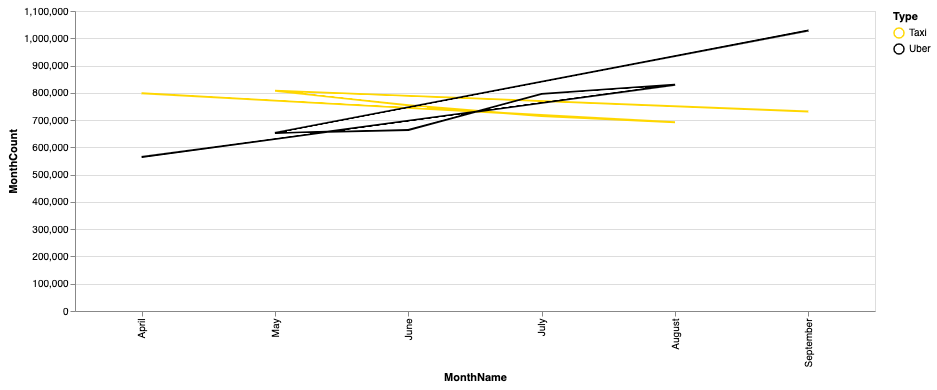

In [44]:
# Line Graph Ordered by Month Name does not work - limitations of Altair

# https://github.com/altair-viz/altair/issues/961
# https://github.com/vega/vega-lite/issues/1520

months=["April", "May", "June", "July", "August", "September"]

alt.Chart(uber_taxi_byMonth).mark_line().encode(
    Color('Type:N',
           scale=Scale(domain=['Taxi','Uber'],
                       range=['gold','black'])),
    x=alt.X('MonthName:N', sort=months),
    y='MonthCount:Q',
).properties(
    width=800
)

In [ ]:
# Workaround: Order by Month Number

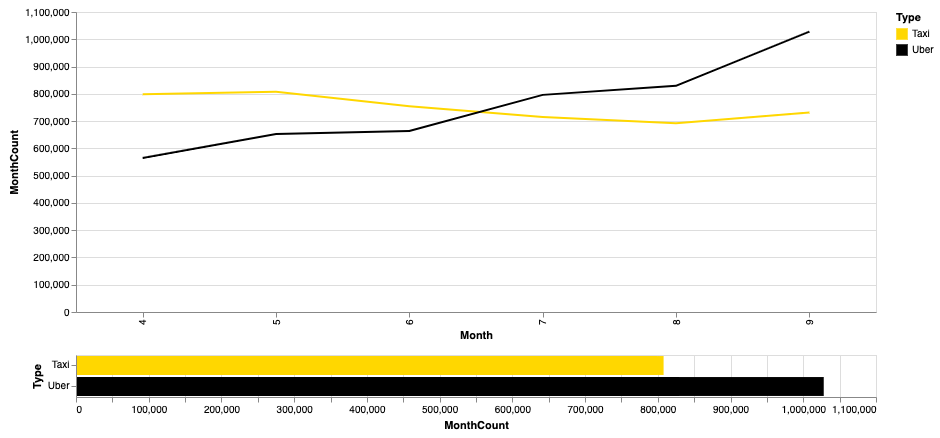

In [45]:
# Line Plot of Pick Up Counts by Month by Type with Interactive Bar Plot on the bottom

brush = alt.selection(type='interval')

# top line graph
points = alt.Chart(uber_taxi_byMonth).mark_line().encode(
    Color('Type:N',
           scale=Scale(domain=['Taxi','Uber'],
                       range=['gold','black'])),
    x='Month:N',
    y='MonthCount:Q', 
    tooltip=['Month:Q']
).properties(
    selection=brush,
    width=800
)

# the bottom bar plot
bars = alt.Chart().mark_bar().encode(
    y='Type:N',
    color='Type:N',
    x='MonthCount:Q'
).transform_filter(
    brush.ref() # the filter transform uses the selection
                # to filter the input data to this chart
).properties(
width=800
)

chart = alt.vconcat(points, bars, data=uber_taxi_byMonth) # vertical stacking
chart

In [ ]:
# To do:
# Change colors for type
# Add Title
# ...

In [ ]:
# Save to later embed in HMTL file
chart.save("uber_taxi_byMonth_chart.html")

In [46]:
# Avg Pick Ups by Hour (Counts) - Avg is done later on

# make copies first
uber_byHourC = uber_2014
taxi_byHourC = taxi_2014

In [ ]:
# Append, ignore index
uber_taxi_byHourC = uber_byHourC.append(taxi_byHourC, ignore_index=True)
uber_taxi_byHourC.head()

In [ ]:
uber_taxi_byHourC.shape

In [ ]:
# Groupby Hour and Type to get Hourly pickup counts for each type of transportation
uber_taxi_byHourC['HourCount']=0
uber_taxi_byHourC=uber_taxi_byHourC.groupby(['Hour','Type'])['HourCount'].count()
uber_taxi_byHourC

In [ ]:
# Reset Index
uber_taxi_byHourC = uber_taxi_byHourC.reset_index()
uber_taxi_byHourC #should have 24 hours months, 2 types - total of 48 rows

In [ ]:
# Line Plot of Pick Up Counts by Hour by Type with Interactive Bar Plot on the bottom

brush = alt.selection(type='interval')

# top line graph
points2 = alt.Chart(uber_taxi_byHourC).mark_line().encode(
    x='Hour:N',
    y='HourCount:Q', 
    color='Type:N',
    tooltip=['Hour:Q']
).properties(
    selection=brush,
    width=800
)

# the bottom bar plot
bars2 = alt.Chart().mark_bar().encode(
    y='Type:N',
    color='Type:N',
    x='HourCount:Q'
).transform_filter(
    brush.ref() # the filter transform uses the selection
                # to filter the input data to this chart
).properties(
width=800
)

chart2 = alt.vconcat(points2, bars2, data=uber_taxi_byHourC) # vertical stacking
chart2

In [ ]:
# To do:
# Change colors for type
# Add Title
# ...

In [ ]:
# Save to later embed in HMTL file
chart.save("uber_taxi_byHour_chart.html")

In [ ]:
# Avg Pick Ups by Hour (Counts)

# make copies first
uber_byHourA = uber_2014
taxi_byHourA = taxi_2014

In [ ]:
print(uber_byHourA.shape)
print(taxi_byHourA.shape)

In [ ]:
# Groupby Hour and Type to get Average Hourly pickups for each type of transportation
uber_byHourA['CountsPickUp']=1
uber_byHourA=uber_byHourA.groupby(['Hour','Type'])['CountsPickUp'].sum()
uber_byHourA.head()

In [ ]:
# Reset Index
uber_byHourA = uber_byHourA.reset_index()
uber_byHourA.head()

In [ ]:
uber_byHourA['AvgHrPickUp']=uber_byHourA['CountsPickUp']/4534327
uber_byHourA.head()

In [ ]:
# Groupby Hour and Type to get Average Hourly pickups for each type of transportation
taxi_byHourA['CountsPickUp']=1
taxi_byHourA=taxi_byHourA.groupby(['Hour','Type'])['CountsPickUp'].sum()
taxi_byHourA.head()

In [ ]:
# Reset Index
taxi_byHourA = taxi_byHourA.reset_index()
taxi_byHourA.head()

In [ ]:
taxi_byHourA['AvgHrPickUp']=taxi_byHourA['CountsPickUp']/4500000
taxi_byHourA.head()

In [ ]:
# Append, ignore index
uber_taxi_byHourA = uber_byHourA.append(taxi_byHourA, ignore_index=True)
uber_taxi_byHourA.head()

In [ ]:
uber_taxi_byHourA.shape

In [ ]:
# Line Plot of Pick Up Counts by Hour by Type with Interactive Bar Plot on the bottom

brush = alt.selection(type='interval')

# top line graph
points3 = alt.Chart(uber_taxi_byHourA).mark_line().encode(
    x='Hour:N',
    y='AvgHrPickUp:Q', 
    color='Type:N',
    tooltip=['Hour:Q']
).properties(
    selection=brush,
    width=800
)

# the bottom bar plot
bars3 = alt.Chart().mark_bar().encode(
    y='Type:N',
    color='Type:N',
    x='AvgHrPickUp:Q'
).transform_filter(
    brush.ref() # the filter transform uses the selection
                # to filter the input data to this chart
).properties(
width=800
)

chart3 = alt.vconcat(points3, bars3, data=uber_taxi_byHourA) # vertical stacking
chart3

In [ ]:
# Taxi and Uber Pick Up Location GIFS

In [50]:
# make copies
uber_pickups = uber_2014
taxi_pickups = taxi_2014

In [52]:
# Append, ignore index
uber_taxi_pickups = uber_pickups.append(taxi_pickups, ignore_index=True)
uber_taxi_pickups.head()

,DateTime,Lat,Lon,Type,Hour,Month,MonthName
0,4/1/2014 0:11:00,40.7690,-73.9549,Uber,0,4,April
1,4/1/2014 0:17:00,40.7267,-74.0345,Uber,0,4,April
2,4/1/2014 0:21:00,40.7316,-73.9873,Uber,0,4,April
3,4/1/2014 0:28:00,40.7588,-73.9776,Uber,0,4,April
4,4/1/2014 0:33:00,40.7594,-73.9722,Uber,0,4,April


In [53]:
uber_taxi_pickups.shape

(9034327, 7)

In [ ]:
# Pick Random Sample
#uber_taxi_pickups_RS = uber_taxi_pickups.sample(n=100000, random_state=1)
    # remember to change df name in the rest of the script if using random sample

In [51]:
import geopandas as gpd
import cartopy.crs as ccrs
from shapely.geometry import Point

In [54]:
# Convert dataframe into geodataframe object
uber_taxi_pickups['Coordinates'] = list(zip(uber_taxi_pickups['Lon'], uber_taxi_pickups['Lat']))
uber_taxi_pickups['Coordinates'] = uber_taxi_pickups['Coordinates'].apply(Point)

In [55]:
# Specify CRS
input_crs = {'init': 'epsg:4326'}
uber_taxi_pickups = gpd.GeoDataFrame(uber_taxi_pickups, geometry='Coordinates', crs=input_crs)

In [56]:
# Convert to Web Mercator (~10 min)
uber_taxi_pickups = uber_taxi_pickups.to_crs(epsg=3857)

In [127]:
import dask.array as da
import dask.dataframe as dd

In [128]:
import datashader as ds
from colorcet import fire
from datashader.colors import Greys9, viridis, inferno
import datashader.transfer_functions as tf

In [129]:
# Separate Uber and Taxi Pick Ups into two subsets

uber_pickups = uber_taxi_pickups[uber_taxi_pickups['Type']=='Uber']
taxi_pickups = uber_taxi_pickups[uber_taxi_pickups['Type']=='Taxi']

In [130]:
print(type(uber_pickups))
print(type(taxi_pickups))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>


In [131]:
print(uber_pickups.shape)
uber_pickups.head()

(4534327, 8)


,DateTime,Lat,Lon,Type,Hour,Month,MonthName,Coordinates
0,4/1/2014 0:11:00,40.7690,-73.9549,Uber,0,4,April,POINT (-8232621.809667466 4978328.692605863)
1,4/1/2014 0:17:00,40.7267,-74.0345,Uber,0,4,April,POINT (-8241482.841134612 4972113.169739443)
2,4/1/2014 0:21:00,40.7316,-73.9873,Uber,0,4,April,POINT (-8236228.56116917 4972832.968795056)
3,4/1/2014 0:28:00,40.7588,-73.9776,Uber,0,4,April,POINT (-8235148.762108474 4976829.552240957)
4,4/1/2014 0:33:00,40.7594,-73.9722,Uber,0,4,April,POINT (-8234547.636858191 4976917.730599972)


In [132]:
print(taxi_pickups.shape)
taxi_pickups.head()

(4500000, 8)


,DateTime,Lat,Lon,Type,Hour,Month,MonthName,Coordinates
4534327,2014-05-26T19:00:00.000,40.724215,-73.997567,Taxi,19,5,May,POINT (-8237371.478381144 4971748.149044121)
4534328,2014-09-26T12:13:34.000,40.747538,-73.981323,Taxi,12,9,September,POINT (-8235563.204572699 4975174.592087769)
4534329,2014-08-03T17:48:47.000,40.646569,-73.789542,Taxi,17,8,August,POINT (-8214214.241308872 4960349.615040787)
4534330,2014-07-02T22:40:55.000,40.761696,-73.984192,Taxi,22,7,July,POINT (-8235882.580191782 4977255.167137696)
4534331,2014-05-01T23:09:00.000,40.757397,-73.966917,Taxi,23,5,May,POINT (-8233959.535988328 4976623.364951192)


In [133]:
print("number of rows UBER = ", len(uber_pickups))
print("number of rows TAXI = ", len(taxi_pickups))

number of rows UBER =  4534327
number of rows TAXI =  4500000


In [134]:
from datashader.utils import lnglat_to_meters as webm

NYC = x_range, y_range = ((-8242000,-8210000), (4965000,4990000))
plot_width  = int(750)
plot_height = int(plot_width//1.2)

#NewYorkCity   = (( -74.39,  -73.44), (40.51, 40.91))
#x_range,y_range = [list(r) for r in webm(*NewYorkCity)]
#plot_width  = int(900)
#plot_height = int(plot_width*7.0/12)

In [135]:
#uber_points = hv.Points(uber_pickups, kdims=['Lat', 'Lon'])

In [136]:
uber_pickups.head()

,DateTime,Lat,Lon,Type,Hour,Month,MonthName,Coordinates
0,4/1/2014 0:11:00,40.7690,-73.9549,Uber,0,4,April,POINT (-8232621.809667466 4978328.692605863)
1,4/1/2014 0:17:00,40.7267,-74.0345,Uber,0,4,April,POINT (-8241482.841134612 4972113.169739443)
2,4/1/2014 0:21:00,40.7316,-73.9873,Uber,0,4,April,POINT (-8236228.56116917 4972832.968795056)
3,4/1/2014 0:28:00,40.7588,-73.9776,Uber,0,4,April,POINT (-8235148.762108474 4976829.552240957)
4,4/1/2014 0:33:00,40.7594,-73.9722,Uber,0,4,April,POINT (-8234547.636858191 4976917.730599972)


In [137]:
uber_pickups['WebM_lon'] = uber_pickups.Coordinates.x
uber_pickups['WebM_lat'] = uber_pickups.Coordinates.y

/anaconda3/envs/musa-620/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/envs/musa-620/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [138]:
# Add Count Column
uber_pickups['Count']=1

/anaconda3/envs/musa-620/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [139]:
uber_pickups.head()

,DateTime,Lat,Lon,Type,Hour,Month,MonthName,Coordinates,WebM_lon,WebM_lat,Count
0,4/1/2014 0:11:00,40.7690,-73.9549,Uber,0,4,April,POINT (-8232621.809667466 4978328.692605863),-8.232622e+06,4.978329e+06,1
1,4/1/2014 0:17:00,40.7267,-74.0345,Uber,0,4,April,POINT (-8241482.841134612 4972113.169739443),-8.241483e+06,4.972113e+06,1
2,4/1/2014 0:21:00,40.7316,-73.9873,Uber,0,4,April,POINT (-8236228.56116917 4972832.968795056),-8.236229e+06,4.972833e+06,1
3,4/1/2014 0:28:00,40.7588,-73.9776,Uber,0,4,April,POINT (-8235148.762108474 4976829.552240957),-8.235149e+06,4.976830e+06,1
4,4/1/2014 0:33:00,40.7594,-73.9722,Uber,0,4,April,POINT (-8234547.636858191 4976917.730599972),-8.234548e+06,4.976918e+06,1


In [102]:
#taxi_points = hv.Points(taxi_pickups, kdims=['Lat', 'Lon'])

In [140]:
taxi_pickups.head()

,DateTime,Lat,Lon,Type,Hour,Month,MonthName,Coordinates
4534327,2014-05-26T19:00:00.000,40.724215,-73.997567,Taxi,19,5,May,POINT (-8237371.478381144 4971748.149044121)
4534328,2014-09-26T12:13:34.000,40.747538,-73.981323,Taxi,12,9,September,POINT (-8235563.204572699 4975174.592087769)
4534329,2014-08-03T17:48:47.000,40.646569,-73.789542,Taxi,17,8,August,POINT (-8214214.241308872 4960349.615040787)
4534330,2014-07-02T22:40:55.000,40.761696,-73.984192,Taxi,22,7,July,POINT (-8235882.580191782 4977255.167137696)
4534331,2014-05-01T23:09:00.000,40.757397,-73.966917,Taxi,23,5,May,POINT (-8233959.535988328 4976623.364951192)


In [141]:
taxi_pickups['WebM_lon'] = taxi_pickups.Coordinates.x
taxi_pickups['WebM_lat'] = taxi_pickups.Coordinates.y

/anaconda3/envs/musa-620/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/envs/musa-620/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [142]:
# Add Count Column
taxi_pickups['Count']=1

/anaconda3/envs/musa-620/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [143]:
taxi_pickups.head()

,DateTime,Lat,Lon,Type,Hour,Month,MonthName,Coordinates,WebM_lon,WebM_lat,Count
4534327,2014-05-26T19:00:00.000,40.724215,-73.997567,Taxi,19,5,May,POINT (-8237371.478381144 4971748.149044121),-8.237371e+06,4.971748e+06,1
4534328,2014-09-26T12:13:34.000,40.747538,-73.981323,Taxi,12,9,September,POINT (-8235563.204572699 4975174.592087769),-8.235563e+06,4.975175e+06,1
4534329,2014-08-03T17:48:47.000,40.646569,-73.789542,Taxi,17,8,August,POINT (-8214214.241308872 4960349.615040787),-8.214214e+06,4.960350e+06,1
4534330,2014-07-02T22:40:55.000,40.761696,-73.984192,Taxi,22,7,July,POINT (-8235882.580191782 4977255.167137696),-8.235883e+06,4.977255e+06,1
4534331,2014-05-01T23:09:00.000,40.757397,-73.966917,Taxi,23,5,May,POINT (-8233959.535988328 4976623.364951192),-8.233960e+06,4.976623e+06,1


In [144]:
# Create GIFs

In [145]:
# Define some functions

In [146]:
def create_image(df, x_range, y_range, w=plot_width, h=plot_height, cmap=fire):
    
    # create the canvas
    cvs = ds.Canvas(plot_width=w, plot_height=h, x_range=x_range, y_range=y_range)
    
    # plot violation locations, counting number of violations
    agg = cvs.points(df, 'WebM_lon', 'WebM_lat',  ds.count('Count'))
    
    # shade
    img = tf.shade(agg, cmap=cmap, how='eq_hist')
    
    # return an PIL image
    return tf.set_background(img, "black").to_pil()

In [147]:
def convert_to_12hour(hr24):
    """
    Convert from 24 hr to 12 hr.
    """
    from datetime import datetime
    d = datetime.strptime(str(hr24), "%H")
    return d.strftime("%I %p")

In [162]:
def plot_picksups_by_hour(fig, df, hour):
    """
    Plot the violations for particular hour
    """
    # trim to the specific hour
    df1 = df.loc[df['Hour']==hour]
    #print(df.count)
    
    # create the datashaded image
    #x_range = Philly[0]
    #y_range = Philly[1]
    img = create_image(df1, x_range, y_range)
    
    # plot the image on a matplotlib axes
    plt.clf()
    ax = fig.gca()
    ax.imshow(img, extent=[x_range[0], x_range[1], y_range[0], y_range[1]])
    ax.axis('off')
    
    # add a text label for the hour
    ax.text(0.05, 0.9, convert_to_12hour(hour), color='white', 
            fontsize=40, ha='left', va='bottom', transform=ax.transAxes)
    
   
    # draw the figure and return the image
    fig.canvas.draw()   
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    
    return image

In [157]:
# Use Functions to Create GIFs

In [158]:
import imageio

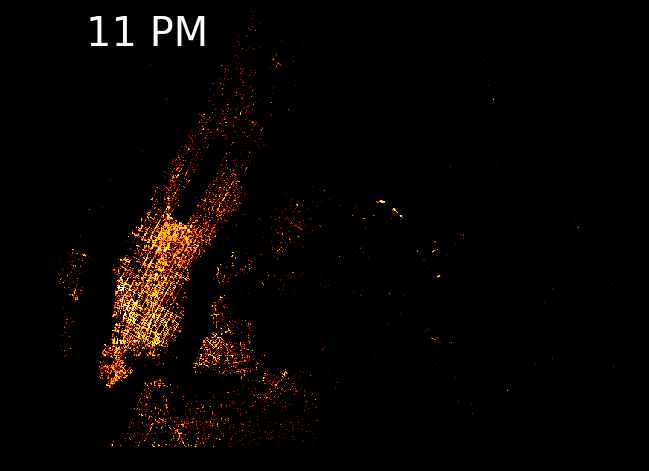

In [163]:
# create a figure for UBER PickUps
fig, ax = plt.subplots(figsize=(10,10), facecolor='black')

hours = range(24)

images=[]
for hour in hours:
    hour_image=plot_picksups_by_hour(fig,uber_pickups,hour)
    images.append(hour_image)

# save the GIF
imageio.mimsave('uber_pickups.gif', images, fps=1);

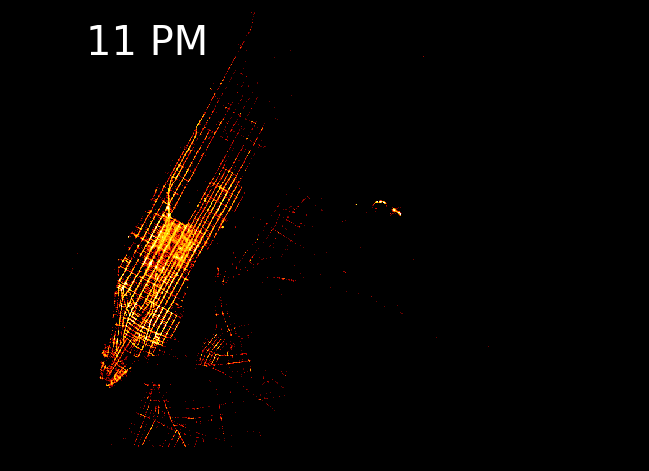

In [101]:
# create a figure for TAXI PickUps
fig, ax = plt.subplots(figsize=(10,10), facecolor='black')

hours = range(24)

images=[]
for hour in hours:
    hour_image=plot_picksups_by_hour(fig,taxi_pickups,hour)
    images.append(hour_image)

# save the GIF
imageio.mimsave('taxi_pickups.gif', images, fps=1);

In [92]:
uber_2014.head()

,DateTime,Lat,Lon,Type,Hour,Month,MonthName
0,4/1/2014 0:11:00,40.7690,-73.9549,Uber,0,4,April
1,4/1/2014 0:17:00,40.7267,-74.0345,Uber,0,4,April
2,4/1/2014 0:21:00,40.7316,-73.9873,Uber,0,4,April
3,4/1/2014 0:28:00,40.7588,-73.9776,Uber,0,4,April
4,4/1/2014 0:33:00,40.7594,-73.9722,Uber,0,4,April


In [91]:
taxi_2014.head()

,DateTime,Lat,Lon,Type,Hour,Month,MonthName
0,2014-05-26T19:00:00.000,40.724215,-73.997567,Taxi,19,5,May
1,2014-09-26T12:13:34.000,40.747538,-73.981323,Taxi,12,9,September
2,2014-08-03T17:48:47.000,40.646569,-73.789542,Taxi,17,8,August
3,2014-07-02T22:40:55.000,40.761696,-73.984192,Taxi,22,7,July
4,2014-05-01T23:09:00.000,40.757397,-73.966917,Taxi,23,5,May


In [ ]:
#Notes:

import osmnx as ox
import networkx as nx
import folium
# Create Base Map of New York - center the map on New York and add custom tiles (carto positron)

tile_url = 'https://{s}.basemaps.cartocdn.com/light_all/{z}/{x}/{y}{r}.png'
attr = '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors &copy; <a href="https://carto.com/attributions">CARTO</a>'

#coordinates in lat and lon
m = folium.Map(
    location=[40.7128, -74.0060],
    zoom_start=13,
    tiles=tile_url,
    attr=attr
)

#m



import pyarrow
import fastparquet
# Make into parquet file 
uber_pickups=uber_pickups.to_parquet('uber_pickups.parquet')
taxi_pickups=taxi_pickups.to_parquet('taxi_pickups.parquet')
# Read Parquet Files
uber_pickups=dd.read_parquet('uber_pickups.parquet')
taxi_pickups=dd.read_parquet('taxi_pickups.parquet')
# force dask to load data into memory
uber_pickups = uber_pickups.persist()
taxi_pickups = taxi_pickups.persist()
# Check df sizes
print("number of rows =", len(uber_pickups))
print("number of rows =", len(taxi_pickups))
# Explore df
uber_pickups.head()
taxi_pickups.head()

In [ ]:
# Traffic Data
traffic = pd.read_csv("Traffic_Volume_Counts__2012-2013.csv")
traffic.head()
print("number of rows UBER = ", len(traffic))